In [137]:
import numpy as np
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import pandas as pd
import shutil 
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer



addit_test_img = "./Desktop/AMLS/test/image"
df_t = pd.read_csv("./Desktop/AMLS/test/label.csv")
mlb = MultiLabelBinarizer()
df_t = pd.DataFrame(mlb.fit_transform(df_t['label']),columns=mlb.classes_)

addit_image_paths = list(paths.list_images(addit_test_img))

test_images = []
    
for image_path in addit_image_paths:
    image = cv2.imread(image_path,0)
    image = cv2.resize(image, (64, 64))
    test_images.append(image)
    
    
label_path = "./Desktop/AMLS/label.csv"
df = pd.read_csv("./Desktop/AMLS/label.csv")

lbl = pd.get_dummies(df['label'])
lbl =np.array(lbl)
print (lbl[1])
path = "./Desktop/AMLS/image"
image_paths = list(paths.list_images(path))
 
images = []
    
for image_path in image_paths:
    image = cv2.imread(image_path,0)
    image = cv2.resize(image, (64, 64))
    images.append(image)


[0 0 1 0]


In [139]:
Y = []
X = []
training_data = []
for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "meningioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
    elif "pituitary_tumor" in (df.iat[i,1]): 
        Y.append(lbl[i])
        X.append(images[i])
    elif "glioma_tumor" in (df.iat[i,1]):
        Y.append(lbl[i])
        X.append(images[i])
for i in range(0,3000):
    training_data.append([X[i],Y[i]])


In [140]:
print(len(training_data))

3000


In [141]:
import random

random.shuffle(training_data)

In [142]:
Y = []
X = []
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1,64,64,1)    
print(X)

[[[[ 1]
   [ 2]
   [ 2]
   ...
   [ 2]
   [ 2]
   [ 1]]

  [[ 7]
   [ 5]
   [ 8]
   ...
   [ 5]
   [ 6]
   [10]]

  [[ 7]
   [ 7]
   [ 7]
   ...
   [ 8]
   [ 7]
   [ 7]]

  ...

  [[ 6]
   [ 7]
   [ 7]
   ...
   [ 8]
   [ 8]
   [ 8]]

  [[ 6]
   [ 7]
   [ 6]
   ...
   [ 5]
   [ 7]
   [ 6]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 1]
   [ 0]
   [ 0]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [ 1]
   [ 1]
   [ 1]]

  [[ 2]
   [ 2]
   [ 2]
   ...
   [ 2]
   [ 2]
   [ 2]]

  [[ 2]
   [ 3]
   [ 3]
   ...
   [ 2]
   [ 2]
   [ 2]]

  ...

  [[ 5]
   [ 4]
   [ 5]
   ...
   [ 3]
   [ 3]
   [ 5]]

  [[ 2]
   [ 3]
   [ 3]
   ...
   [ 2]
   [ 3]
   [ 3]]

  [[ 0]
   [ 0]
   [ 0]
   ...
   [ 1]
   [ 1]
   [ 1]]]


 [[[ 0]
   [ 0]
   [ 0]
   ...
   [ 1]
   [ 1]
   [ 1]]

  [[ 2]
   [ 2]
   [ 2]
   ...
   [ 2]
   [ 2]
   [ 2]]

  [[ 3]
   [ 3]
   [ 3]
   ...
   [ 2]
   [ 2]
   [ 2]]

  ...

  [[ 4]
   [ 3]
   [ 3]
   ...
   [ 2]
   [ 2]
   [ 2]]

  [[ 2]
   [ 2]
   [ 2]
   ...
   [ 3]
   [ 3]
   [ 2]]

  [[ 0

In [143]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
from keras.layers import Convolution2D
from keras.utils.np_utils import to_categorical
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

In [144]:
#X = X/255.0
Y =np.array(Y)

In [146]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
#model.add(Dropout(.1))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(64))
          
model.add(Dense(4))
model.add(Activation('softmax'))
          
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
model.fit(X,Y, batch_size=64,epochs=15,validation_split=0.1)

Epoch 1/15
43/43 [==============================] - 9s 210ms/step - loss: 67.4811 - accuracy: 0.3919 - val_loss: 1.2935 - val_accuracy: 0.4433
Epoch 2/15
43/43 [==============================] - 9s 209ms/step - loss: 1.2010 - accuracy: 0.5056 - val_loss: 1.1867 - val_accuracy: 0.4333
Epoch 3/15
43/43 [==============================] - 9s 212ms/step - loss: 1.0202 - accuracy: 0.5833 - val_loss: 1.0643 - val_accuracy: 0.5500
Epoch 4/15
43/43 [==============================] - 9s 210ms/step - loss: 0.9261 - accuracy: 0.6304 - val_loss: 1.0061 - val_accuracy: 0.5767
Epoch 5/15
43/43 [==============================] - 9s 214ms/step - loss: 0.8738 - accuracy: 0.6541 - val_loss: 0.9672 - val_accuracy: 0.6133
Epoch 6/15
43/43 [==============================] - 9s 213ms/step - loss: 0.8361 - accuracy: 0.6663 - val_loss: 0.9224 - val_accuracy: 0.6133
Epoch 7/15
43/43 [==============================] - 9s 213ms/step - loss: 0.8202 - accuracy: 0.6833 - val_loss: 0.8932 - val_accuracy: 0.6400
Epoch

In [16]:
X = np.array(X) / 512.0
Y = Y.reshape(len(Y),-1)
#X.shape

In [21]:
OneHotEncoder(handle_unknown='ignore').fit_transform(df)

from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df= label_encoder.fit_transform(df['label']) 
print(df.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [20]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df['label'] = df['label'].apply(le.fit_transform)
df['label'].head()
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(df)

# 3. Transform
onehotlabels = enc.transform(df).toarray()
onehotlabels


ValueError: y should be a 1d array, got an array of shape () instead.

In [6]:
Y = []
X = []
print(df[6,1])
for i in range(0, 3000):
    
    if "no_tumor" in (df.iat[i,1]): 
        Y.append(0)
        X.append(images[i])
    elif "meningioma_tumor" in (df.iat[i,1]):
        Y.append(1)
        X.append(images[i])
    elif "pituitary_tumor" in (df.iat[i,1]):
        Y.append(2)
        X.append(images[i])
    elif "glioma_tumor" in (df.iat[i,1]):
        Y.append(3) 
        X.append(images[i])
X=np.array(X)

Y=np.array(Y)
Y = Y.reshape(len(Y),-1)



X.shape

KeyError: (6, 1)

In [57]:
Y[56]

array([3])

In [76]:

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify= Y)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
from keras.layers import Convolution2D
from keras.utils.np_utils import to_categorical
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.image import ImageDataGenerator

In [76]:
classifier = Sequential()
classifier.add(Convolution2D(64,3,3,input_shape=(32,32,3),activation ='relu'))
classifier.add(Dropout(.1))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Flatten())
classifier.add(Dense(1024,activation ='relu'))
classifier.add(Dense(512,activation ='relu'))
classifier.add(Dense(4,activation ='softmax'))

classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory("./Desktop/AMLS/trial",target_size = (32,32),batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory("./Desktop/AMLS/trial_test",target_size = (32,32),batch_size=32, class_mode='categorical')

train_samples = len(training_set.filenames)
num_classes = len(training_set.class_indices)


Found 3000 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [78]:
history = classifier.fit_generator(
    training_set,steps_per_epoch=64,epochs=15,
    validation_data=test_set,validation_steps=10)

C:\Users\celik\AppData\Local\Temp/ipykernel_5272/1712339668.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/15
64/64 [==============================] - 10s 155ms/step - loss: 0.4387 - accuracy: 0.5564 - val_loss: 0.6684 - val_accuracy: 0.3300
Epoch 2/15
64/64 [==============================] - 8s 129ms/step - loss: 0.4092 - accuracy: 0.5864
Epoch 3/15
64/64 [==============================] - 9s 141ms/step - loss: 0.3932 - accuracy: 0.6152
Epoch 4/15
64/64 [==============================] - 9s 147ms/step - loss: 0.3840 - accuracy: 0.6255
Epoch 5/15
64/64 [==============================] - 9s 147ms/step - loss: 0.3796 - accuracy: 0.6333
Epoch 6/15
64/64 [==============================] - 9s 148ms/step - loss: 0.3649 - accuracy: 0.6348
Epoch 7/15
64/64 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.66 - 9s 146ms/step - loss: 0.3572 - accuracy: 0.6623
Epoch 8/15
64/64 [==============================] - 9s 148ms/step - loss: 0.3406 - accuracy: 0.6841
Epoch 9/15
64/64 [==============================] - 9s 147ms/step - loss: 0.3365 - accuracy: 0.6846
Epoch 10/15
64/

In [79]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128,128,3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='selu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adam')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_34 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_16 (Bat  (None, 128, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)       

In [81]:
def model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [85]:
history = model.fit(train_X, train_Y, epochs=3, batch_size=40, verbose=1,validation_data=(test_X, test_Y))

TypeError: model() got an unexpected keyword argument 'verbose'

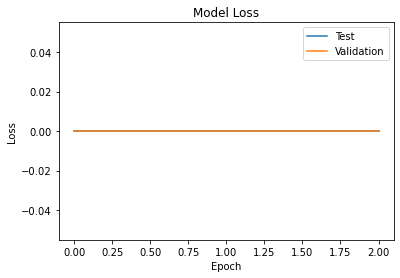

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [ ]:
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [36]:
# learning parameters
learning_rate = 1e-5
training_epochs = 50

# display training accuracy every ..
display_accuracy_step = 10

training_images, training_labels, test_images, test_labels = train_test_split(X, Y, test_size= 0.2, random_state= 42, stratify= Y)

logits, X, Y = multilayer_perceptron()

# define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# define training graph operation
train_op = optimizer.minimize(loss_op)

# graph operation to initialize all variables
init_op = tf.global_variables_initializer()

InvalidArgumentError: In[0] and In[1] has different ndims: [49152000] vs. [136,1000] [Op:MatMul]

In [ ]:
with tf.Session() as sess:

        # run graph weights/biases initialization op
        sess.run(init_op)
        # begin training loop ..
        for epoch in range(training_epochs):
            # complete code below
            # run optimization operation (backprop) and cost operation (to get loss value)
            _, cost = sess.run([train_op, loss_op], feed_dict={X: ...,
                                                               Y: ...})

            # Display logs per epoch step
            print("Epoch:", '%04d' % (epoch + 1), "cost={:.9f}".format(cost))
                
            if epoch % display_accuracy_step == 0:
                pred = tf.nn.softmax(logits)  # Apply softmax to logits
                correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))

                # calculate training accuracy
                accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                print("Accuracy: {:.3f}".format(accuracy.eval({X: training_images, Y: training_labels})))

        print("Optimization Finished!")

        # -- Define and run test operation -- #
        
        # apply softmax to output logits
        pred = tf.nn.softmax(logits)
        
        #  derive inffered calasses as the class with the top value in the output density function
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
        
        # calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            
        # complete code below
        # run test accuracy operation ..
        print("Test Accuracy:", accuracy.eval({X: ..., Y: ...}))

